

# Femhack challenge

# EDA

In [210]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from pandas.plotting import scatter_matrix
%matplotlib inline

In [453]:
# Crear dataframe a partir de .csv
df = pd.read_csv('train_clean.csv',delimiter=',',dtype={'Open': np.float64,'High':np.float64,'Low':np.float64,'Close':np.float64,'rsi':np.float64,'ema_fast':np.float64,'ema_slow':np.float64})

# Mostrar número de filas y columnas del dataframe
print("Filas: " + str(df.shape[0]) + " Cols: " + str(df.shape[1]))

df.drop('Unnamed: 0',axis=1,inplace=True)
# Mostrar las primeras 10 filas (TO-DO)
df.head(10)

Filas: 992 Cols: 11


,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,target
0,2000-10-16,0.5882,0.5923,0.5775,0.5785,30.382367,0.602323,0.610376,2.605170,1
1,2000-10-23,0.5786,0.5876,0.5731,0.5784,30.343134,0.599133,0.608889,2.598570,1
2,2000-10-30,0.5783,0.6044,0.5771,0.5980,45.262621,0.598982,0.608382,2.659958,1
3,2000-11-06,0.5982,0.6079,0.5940,0.6040,48.872746,0.599651,0.608179,2.609805,1
4,2000-11-13,0.6042,0.6052,0.5941,0.5966,44.936330,0.599244,0.607640,2.586345,1
5,2000-11-20,0.5967,0.6024,0.5930,0.5989,46.381859,0.599198,0.607234,2.504494,1
6,2000-11-27,0.5988,0.6143,0.5952,0.6100,52.819203,0.600639,0.607362,2.506936,1
7,2000-12-04,0.6099,0.6208,0.6079,0.6097,52.635272,0.601847,0.607471,2.480143,1
8,2000-12-11,0.6098,0.6179,0.6000,0.6070,50.916767,0.602534,0.607449,2.523872,1
9,2000-12-18,0.6068,0.6263,0.6050,0.6245,60.026493,0.605463,0.608242,2.521545,1


In [454]:
# Crear dataframe a partir de .csv
df_test = pd.read_csv('test_x.csv',delimiter=',',dtype={'Open': np.float64,'High':np.float64,'Low':np.float64,'Close':np.float64,'rsi':np.float64,'ema_fast':np.float64,'ema_slow':np.float64})
df_test

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2019-11-04,0.86290,0.86561,0.85930,0.86206,34.917807,0.879483,0.883823,1.630470
1,2019-11-11,0.86133,0.86192,0.85445,0.85610,32.209828,0.876366,0.882534,1.588042
2,2019-11-18,0.85552,0.86043,0.85241,0.85781,33.796239,0.873892,0.881384,1.538452
3,2019-11-25,0.85750,0.85840,0.85000,0.85130,30.837556,0.870879,0.879985,1.509968
4,2019-12-02,0.85328,0.85730,0.84138,0.84138,26.963846,0.866946,0.878189,1.553796
...,...,...,...,...,...,...,...,...,...
110,2021-12-13,0.85310,0.85521,0.84515,0.84625,46.962057,0.848497,0.856126,1.402182
111,2021-12-20,0.84971,0.85494,0.84019,0.84019,43.904648,0.847390,0.855384,1.436814
112,2021-12-27,0.84476,0.84560,0.83679,0.84060,44.169482,0.846484,0.854697,1.408395
113,2022-01-03,0.84104,0.84181,0.83362,0.83818,42.882584,0.845377,0.853929,1.381365


In [455]:
#eliminamos primeras filas ya que no hay valores de ema_slow
df=df[42:].reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,target
0,2001-08-06,0.6180,0.6284,0.6159,0.6277,58.361694,0.614335,0.615771,2.182713,0
1,2001-08-13,0.6276,0.6360,0.6268,0.6344,61.837373,0.617010,0.616638,2.108985,0
2,2001-08-20,0.6342,0.6362,0.6201,0.6321,59.986247,0.619022,0.617357,2.147402,0
3,2001-08-27,0.6320,0.6323,0.6239,0.6254,54.836495,0.619873,0.617731,2.111317,0
4,2001-09-03,0.6251,0.6271,0.6067,0.6202,51.165175,0.619916,0.617846,2.211893,0


In [456]:
# Hallar número de valores únicos en cada columna (TO-DO)
df.astype('object').describe(include='all').loc['unique', :]

Date            950
Open          858.0
High          856.0
Low           854.0
Close         835.0
rsi           949.0
ema_fast      950.0
ema_slow      950.0
volatility    950.0
target            2
Name: unique, dtype: object

In [457]:
# Comprobar la existencia de valores nulos en el dataset
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
rsi           0
ema_fast      0
ema_slow      0
volatility    0
target        0
dtype: int64

In [458]:
# Mostrar información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        950 non-null    object 
 1   Open        950 non-null    float64
 2   High        950 non-null    float64
 3   Low         950 non-null    float64
 4   Close       950 non-null    float64
 5   rsi         950 non-null    float64
 6   ema_fast    950 non-null    float64
 7   ema_slow    950 non-null    float64
 8   volatility  950 non-null    float64
 9   target      950 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 74.3+ KB


In [459]:
# Descripción analítica básica del dataframe
df.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,target
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,0.779865,0.788551,0.773295,0.780236,51.463325,0.778409,0.774466,2.119849,0.507368
std,0.091948,0.104375,0.090453,0.091911,10.321596,0.091201,0.089682,1.511489,0.500209
min,0.608900,0.613500,0.603800,0.609000,19.171099,0.614186,0.615771,1.006340,0.000000
25%,0.687300,0.692750,0.683650,0.687325,44.448536,0.686039,0.683706,1.444021,0.000000
50%,0.796700,0.803050,0.790280,0.797120,50.794328,0.797054,0.802318,1.768004,1.000000
75%,0.864650,0.872400,0.857275,0.864675,57.851999,0.864826,0.857963,2.170925,1.000000
max,0.961400,2.233500,0.943800,0.961600,79.522395,0.903959,0.889572,17.421381,1.000000


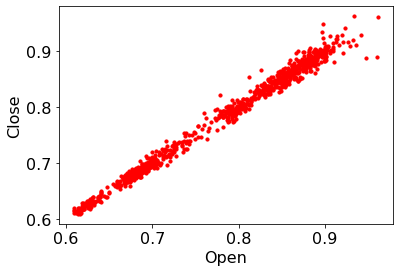

In [460]:
# Scatterplot de open y close para
df.plot.scatter(x='Open', y='Close', s=10, c='red');

#parece que no hay correlacion entre las variables

## Buscamos correlaciones entre las variables


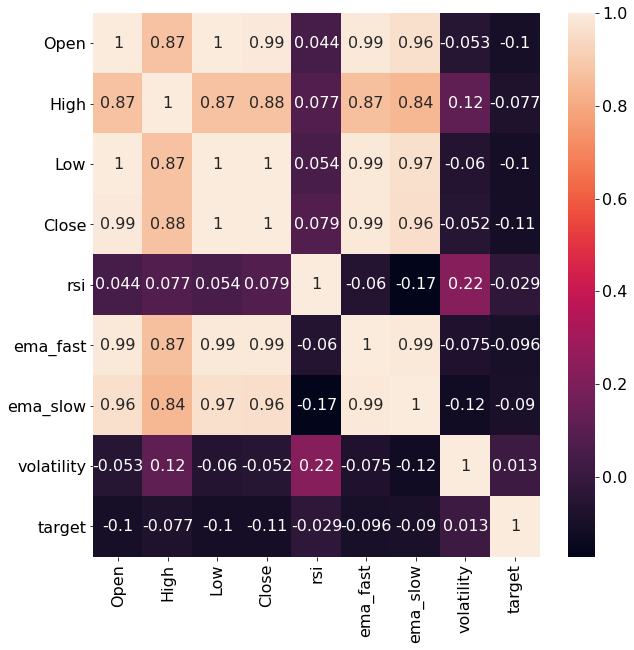

In [461]:
# Se muestra la matriz de correlacion entre variables
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True);

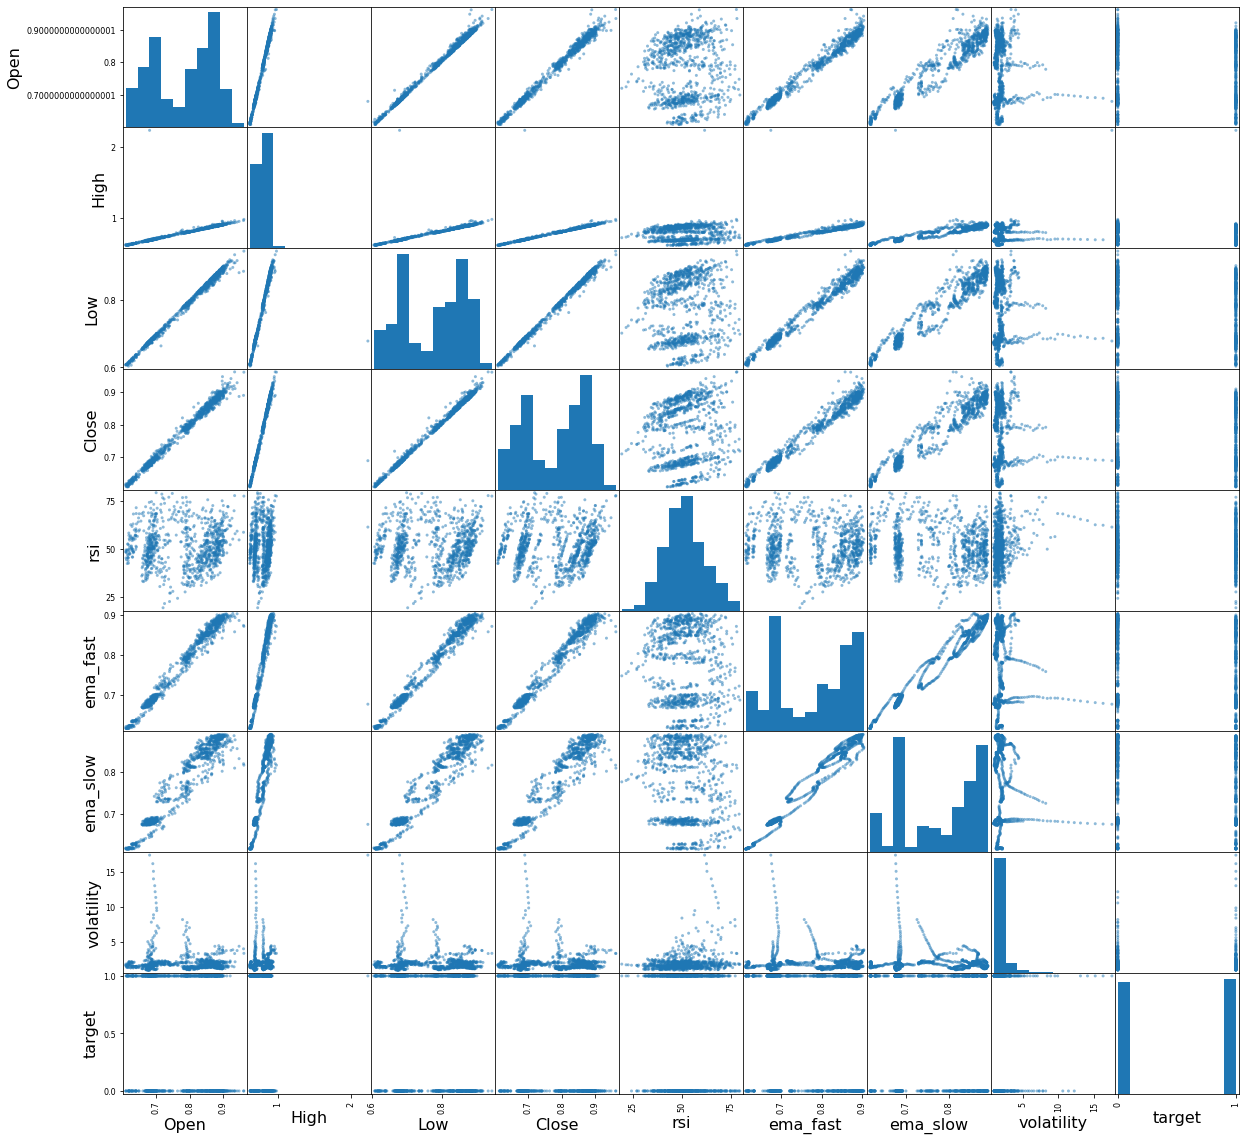

In [462]:
# Mostrar correlaciones como una función discreta entre las diferentes variables con una matriz

scatter_matrix(df, figsize=(20, 20));

In [463]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility', 'target'],
      dtype='object')

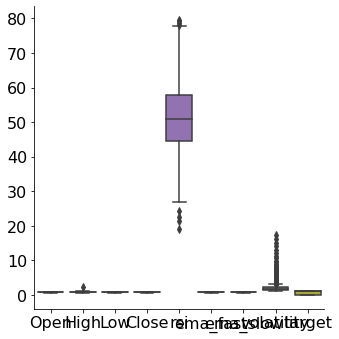

In [464]:
sns.catplot(data=df, kind = 'box')

In [465]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility', 'target'],
      dtype='object')

Text(0.5, 0, 'Semana')

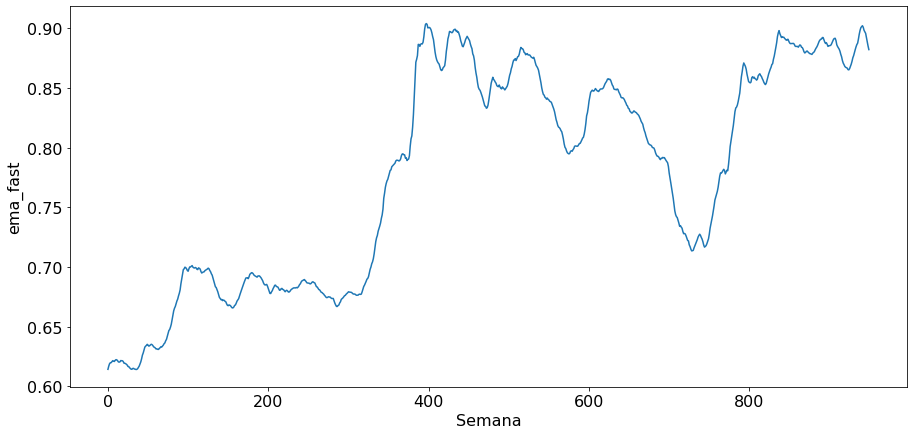

In [466]:

plt.figure(figsize=(15, 7))

df['ema_fast'].plot()
plt.ylabel('ema_fast')
plt.xlabel('Semana')



Text(0.5, 0, 'Semana')

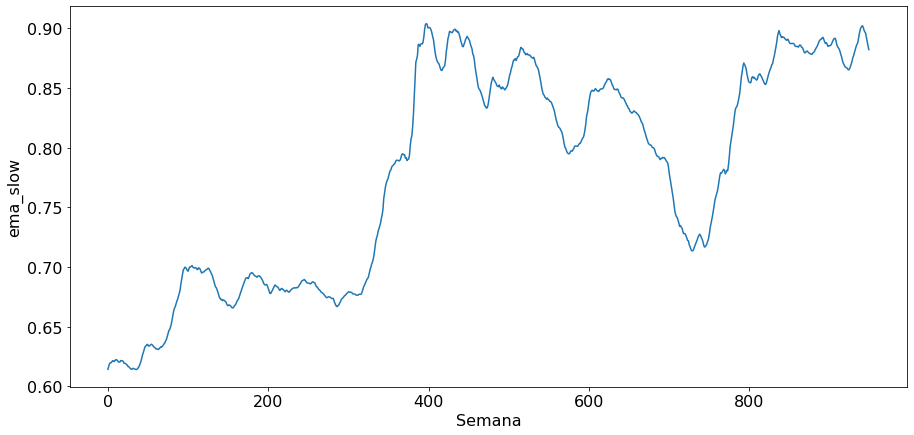

In [467]:

plt.figure(figsize=(15, 7))

df['ema_fast'].plot()
plt.ylabel('ema_slow')
plt.xlabel('Semana')



<AxesSubplot:xlabel='rsi', ylabel='Count'>

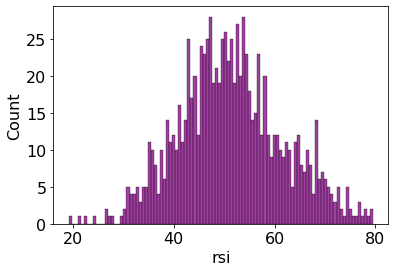

In [468]:
sns.histplot(df['rsi'].dropna(), bins=100, color='purple')

In [469]:
# #Creamos variable uptrend restando ema_fast y ema_slow
df['uptrend']=df['ema_fast']-df['ema_slow']

## Correlacion sin outliers y estandarizando

In [471]:
X=df.drop(['Date','target'], axis = 1)
y=df['target']

In [472]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

df_X_sc=pd.DataFrame(X_sc)
df_X_sc.rename(columns={0:'Open',1:'High',2:'Low',3:'Close',4:'rsi', 5:'ema_fast', 6:'ema_slow',
       7:'volatility',8:'uptrend'},inplace=True)


In [473]:
df_X_sc['Date']=good_data['Date']

In [474]:
df_X_sc.set_index('Date',inplace=True)

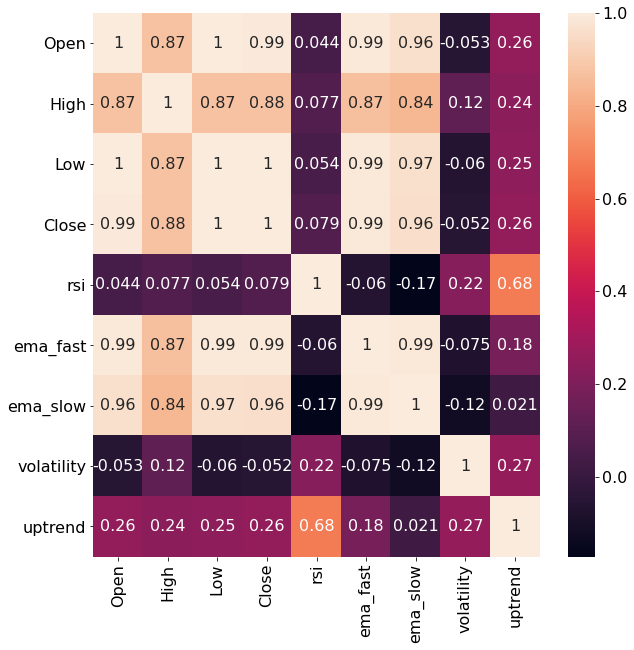

In [475]:
# Se muestra la matriz de correlacion entre variables
plt.figure(figsize=(10, 10))
sns.heatmap(df_X_sc.corr(),annot=True);

<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

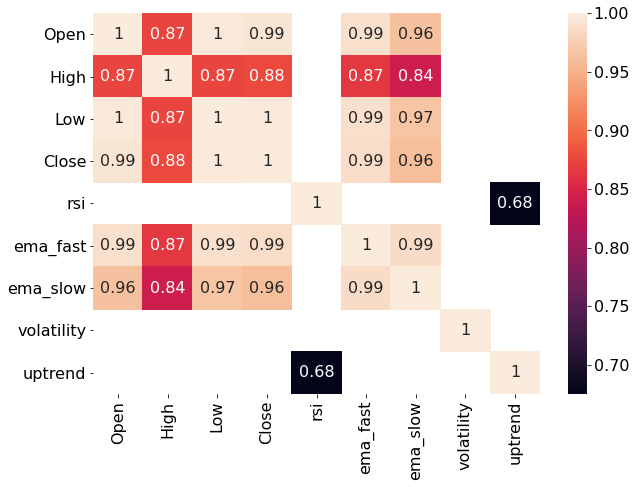

In [476]:
plt.figure(figsize=(10, 7))
correlation=df_X_sc.corr()
max_corr = correlation[(correlation>0.6)|(correlation<-0.6)]
plt.figure(figsize=(10, 7))
sns.heatmap(max_corr, annot=True)

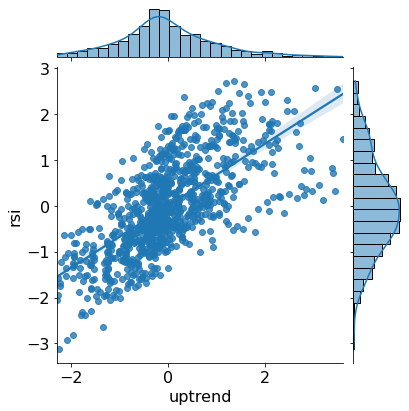

In [477]:
#como vemos uptrend y rsi están correlacionados
sns.jointplot(data=df_X_sc, x="uptrend", y="rsi", kind="reg")

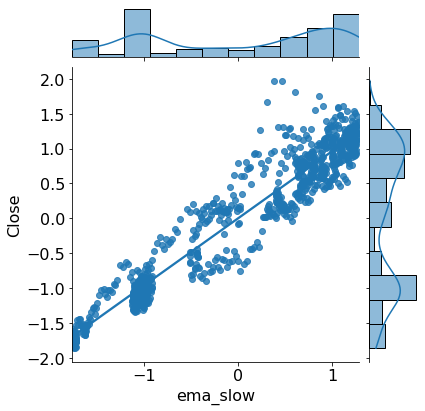

In [478]:
#como vemos uptrend y rsi están correlacionados
sns.jointplot(data=df_X_sc, x="ema_slow", y="Close", kind="reg")

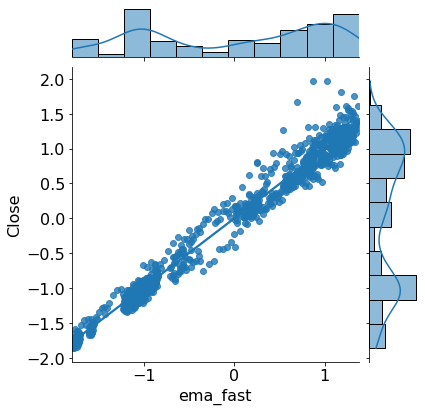

In [479]:
#como vemos uptrend y rsi están correlacionados
sns.jointplot(data=df_X_sc, x="ema_fast", y="Close", kind="reg")

# PCA

In [480]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_sc)


In [481]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.42388339e-01, 2.06949283e-01, 9.66047066e-02, 3.41058155e-02,
       1.86850903e-02, 7.18587802e-04, 3.94416054e-04, 1.53762353e-04,
       2.04039854e-33])

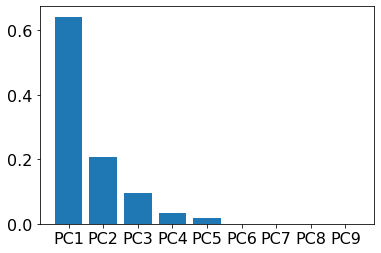

In [482]:
fig, ax = plt.subplots()
plt.bar(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'], explained_variance)
plt.show()

In [483]:
columns=df_X_sc.columns
columns

Index(['Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility', 'uptrend'],
      dtype='object')

In [484]:

columns=columns
pca_values=pca.components_
pca.components_

array([[-4.14021750e-01, -3.77687613e-01, -4.14236210e-01,
        -4.13859159e-01, -1.57281768e-02, -4.12343223e-01,
        -4.02072602e-01,  1.50613288e-02, -1.04419762e-01],
       [ 9.89488596e-05,  6.08537930e-02, -1.59607790e-03,
         1.42265235e-02,  6.40620418e-01, -6.83578959e-02,
        -1.73076644e-01,  3.97864183e-01,  6.26716131e-01],
       [-2.84624924e-02,  1.69398682e-01, -3.66358252e-02,
        -4.13528878e-02, -3.31830471e-01,  9.20883406e-03,
         4.74909644e-02,  8.95407864e-01, -2.30726742e-01],
       [-2.58594812e-02,  1.84685236e-01,  1.93624416e-02,
         4.37376521e-02,  6.64713614e-01, -8.28249831e-02,
         3.40441604e-02,  2.80026413e-02, -7.15742583e-01],
       [-1.59579032e-01,  8.89198493e-01, -1.71492158e-01,
        -1.69718863e-01, -1.27364497e-01, -1.62464392e-01,
        -1.82454911e-01, -1.97121768e-01,  1.04323252e-01],
       [ 6.67054236e-01, -9.73792767e-03,  3.23036496e-01,
        -4.23125299e-02, -9.85475916e-02, -4.677474

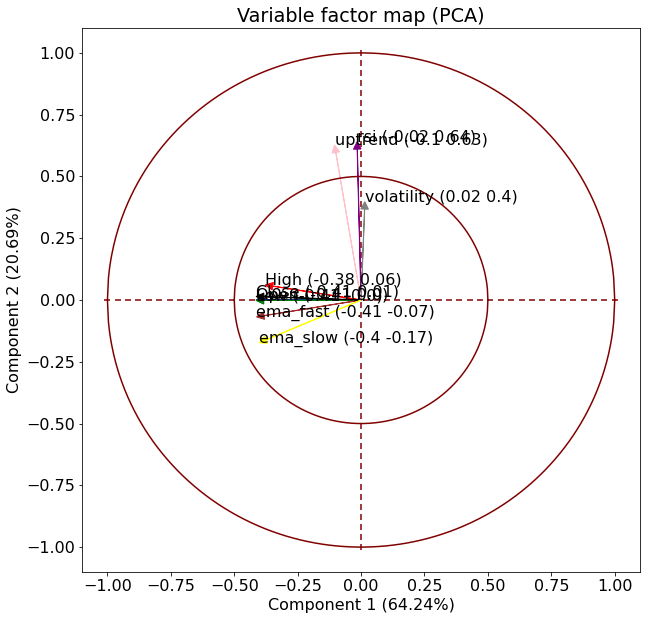

In [485]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})

# Plot circle
# Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=50)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown','yellow','grey','pink']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)
    
add_string=""
for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i], 
             s=columns[i] + add_string )

     
plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
plt.title('Variable factor map (PCA)')
plt.show()

# Randomforest

In [486]:
len(df_X_sc)

950

In [487]:
df_X_sc=df_X_sc.drop('uptrend',axis=1)
df_X_sc.head()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
Date,,,,,,,,
2000-10-23,-1.761317,-1.535187,-1.740991,-1.660480,0.668695,-1.799999,-1.770466,0.041613
2000-10-30,-1.656856,-1.462334,-1.620423,-1.587545,1.005611,-1.770649,-1.760800,-0.007191
2000-11-06,-1.585039,-1.460417,-1.694533,-1.612582,0.826172,-1.748576,-1.752776,0.018239
2000-11-13,-1.608978,-1.497802,-1.652500,-1.685518,0.326979,-1.739247,-1.748602,-0.005648
2000-11-20,-1.684060,-1.547648,-1.842755,-1.742124,-0.028901,-1.738768,-1.747321,0.060929


In [488]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [489]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import max_error, median_absolute_error, mean_absolute_error,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier


In [490]:
#Tres lineas de código
rfr = RandomForestClassifier()
kf = KFold(5, shuffle=True, random_state=42)
scores = cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)

In [491]:
print(f'{np.abs(scores.mean()):.2f} MSE con una desviación de {scores.std():.3f}')

0.29 MSE con una desviacioón de 0.040


In [492]:
from pprint import pprint
# parametros usados con random forest
pprint(rfr.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [493]:
#ajustamos parametros con gridsearchcv
dict_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 8, 15],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [494]:
rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                             dict_params,
                             random_state=0)
rf_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 8, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 150, 200]},
                   random_state=0)

In [495]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15}

In [496]:
rfr = RandomForestClassifier(n_estimators=200,
                            min_samples_split=15,
                            min_samples_leaf=2,
                            max_features='log2',
                            max_depth=5,
                            random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [497]:
print(f'accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'f1_score: {f1_score(y_test, y_pred):.2f}')

accuracy: 0.64
f1_score: 0.69


# Xboost

In [498]:
from xgboost import XGBClassifier

In [499]:

# fit model no training data
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

[18:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [500]:
print(f'accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'f1_score: {f1_score(y_test, y_pred):.2f}')

accuracy: 0.73
f1_score: 0.75


In [501]:
#hyperparameter tuning

In [502]:
#XGBoost - GridSearch process
parameters = { 'max_depth': [2,5,10],
           'learning_rate': [0.1, 0.2],
           'n_estimators': [10,50,100],
           'colsample_bytree': [0.2, 0.3],
           'objective':['reg:squarederror', 'reg:logistic']}

clf = GridSearchCV(model_xgb, parameters, n_jobs=4)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6872180451127818 {'colsample_bytree': 0.3, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'objective': 'reg:logistic'}


In [503]:
import statistics

In [505]:
#Cross Validation - XGBoost
#Create classifier object - using parameters defined from GridSearch
model1 = XGBClassifier(colsample_bytree=0.3,learning_rate=0.2,max_depth=5,n_estimators=100,objective='reg:squarederror')

#Stratified k-Fold
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
model1_accu = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model1.fit(x_train_fold, y_train_fold)
    model1_accu.append(model1.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', model1_accu)
print('Maximum Accuracy That can be obtained from this model is:',
      max(model1_accu)*100, '%')
print('Minimum Accuracy:',
      min(model1_accu)*100, '%')
# print('Overall Accuracy:',
#       statistics.mean(model1_accu)*100, '%')
# print('Standard Deviation is:', statistics.stdev(model1_accu))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

List of possible accuracy: [0.6268656716417911, 0.7014925373134329, 0.6716417910447762, 0.7014925373134329, 0.7164179104477612, 0.7878787878787878, 0.696969696969697, 0.6818181818181818, 0.8333333333333334, 0.6363636363636364]
Maximum Accuracy That can be obtained from this model is: 83.33333333333334 %
Minimum Accuracy: 62.68656716417911 %


In [506]:
predictions = model1.predict(X_test)
y_pred1 = [round(value) for value in predictions]

In [507]:
f1 = f1_score(y_test, y_pred1)
print('F1 score XGBoost model:',f1)

F1 score XGBoost model: 0.8361204013377928


# Gradient boost

In [508]:
from sklearn.ensemble import GradientBoostingClassifier

In [509]:
# fit model no training data
model_gbc=GradientBoostingClassifier()
model_gbc.fit(X_train, y_train)
y_pred = model_gbc.predict(X_test)

In [510]:
print(f'accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'f1_score: {f1_score(y_test, y_pred):.2f}')

accuracy: 0.66
f1_score: 0.68


In [511]:
#hyperparameter tuning
# define the model with default hyperparameters
model = GradientBoostingClassifier()

In [512]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [513]:
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for statistics.mean, statistics.stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (statistics.mean, statistics.stdev, param))

Best: 0.731946 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.7}
0.505246 (0.004825) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.505246 (0.004825) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.505246 (0.004825) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.505246 (0.004825) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.505246 (0.004825) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.505246 (0.004825) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.505246 (0.004825) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.505246 (0.004825) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.506739 (0.009744) with: {'learning_rate': 0.0001,

In [514]:
#Cross Validation - XGBoost
#Create classifier object - using parameters defined from GridSearch
model2 = GradientBoostingClassifier(learning_rate=1,max_depth=9,n_estimators=500)

#Stratified k-Fold
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
model2_accu = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model2.fit(x_train_fold, y_train_fold)
    model2_accu.append(model2.score(x_test_fold, y_test_fold))

# print('List of possible accuracy:', model2_accu)
# print('Maximum Accuracy That can be obtained from this model is:',
#       max(model2_accu)*100, '%')
# print('Minimum Accuracy:',
#       min(model2_accu)*100, '%')
# print('Overall Accuracy:',
#       statistics.mean(model2_accu)*100, '%')
# print('Standard Deviation is:', statistics.stdev(model2_accu))

In [515]:
predictions = model2.predict(X_test)
y_pred2 = [round(value) for value in predictions]

In [516]:
f1 = f1_score(y_test, y_pred2)
print('F1 score GradientBoost model:',f1)

F1 score GradientBoost model: 0.8188405797101449


# Adaboost

In [517]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


In [518]:
# fit model no training data
model_ada=AdaBoostClassifier()
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)

In [519]:
print(f'accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'f1_score: {f1_score(y_test, y_pred):.2f}')

accuracy: 0.64
f1_score: 0.66


In [520]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [521]:
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [522]:
search.best_score_

0.6284034373586612

In [523]:
score=np.mean(cross_val_score(ada,X,y,scoring='accuracy',cv=crossvalidation,n_jobs=1))


In [524]:
#Cross Validation - AdaBoost
#Create classifier object - using parameters defined from GridSearch
model3 = AdaBoostClassifier(learning_rate=0.1,n_estimators=2000)

#Stratified k-Fold
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
model3_accu = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model3.fit(x_train_fold, y_train_fold)
    model3_accu.append(model3.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', model1_accu)
print('Maximum Accuracy That can be obtained from this model is:',
      max(model3_accu)*100, '%')
print('Minimum Accuracy:',
      min(model3_accu)*100, '%')
# print('Overall Accuracy:',
#       statistics.mean(model3_accu)*100, '%')
# print('Standard Deviation is:', statistics.stdev(model3_accu))

List of possible accuracy: [0.6268656716417911, 0.7014925373134329, 0.6716417910447762, 0.7014925373134329, 0.7164179104477612, 0.7878787878787878, 0.696969696969697, 0.6818181818181818, 0.8333333333333334, 0.6363636363636364]
Maximum Accuracy That can be obtained from this model is: 72.72727272727273 %
Minimum Accuracy: 54.54545454545454 %


In [530]:
predictions = model3.predict(X_test)
y_pred3 = [round(value) for value in predictions]

print(f'accuracy: {accuracy_score(y_test, y_pred3):.5f}')
print(f'f1_score: {f1_score(y_test, y_pred3):.5f}')

accuracy: 0.82456
f1_score: 0.83660


In [528]:
#Cross Validation - XGBoost
#Create classifier object - using parameters defined from GridSearch
model3 = AdaBoostClassifier(learning_rate=0.1,n_estimators=2000)

#Stratified k-Fold
skf = RepeatedStratifiedKFold(n_splits=10, random_state=1)
model3_accu = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model3.fit(x_train_fold, y_train_fold)
    model3_accu.append(model3.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', model3_accu)
print('Maximum Accuracy That can be obtained from this model is:',
      max(model3_accu)*100, '%')
print('Minimum Accuracy:',
      min(model3_accu)*100, '%')
# print('Overall Accuracy:',
#       statistics.mean(model3_accu)*100, '%')
# print('Standard Deviation is:', statistics.stdev(model3_accu))

List of possible accuracy: [0.6631578947368421, 0.6631578947368421, 0.6210526315789474, 0.6947368421052632, 0.5894736842105263, 0.6210526315789474, 0.6210526315789474, 0.6210526315789474, 0.7052631578947368, 0.6631578947368421, 0.6947368421052632, 0.7052631578947368, 0.6526315789473685, 0.6105263157894737, 0.5789473684210527, 0.6210526315789474, 0.6105263157894737, 0.631578947368421, 0.631578947368421, 0.6631578947368421, 0.6736842105263158, 0.6210526315789474, 0.631578947368421, 0.6631578947368421, 0.6736842105263158, 0.6947368421052632, 0.5473684210526316, 0.6210526315789474, 0.6631578947368421, 0.6736842105263158, 0.7368421052631579, 0.6631578947368421, 0.6105263157894737, 0.631578947368421, 0.6, 0.6421052631578947, 0.5789473684210527, 0.631578947368421, 0.7368421052631579, 0.5578947368421052, 0.6, 0.6210526315789474, 0.6210526315789474, 0.6526315789473685, 0.5684210526315789, 0.6526315789473685, 0.6421052631578947, 0.6736842105263158, 0.6105263157894737, 0.6631578947368421, 0.65263

In [529]:
predictions = model3.predict(X_test)
y_pred4 = [round(value) for value in predictions]

print(f'accuracy: {accuracy_score(y_test, y_pred4):.5f}')
print(f'f1_score: {f1_score(y_test, y_pred4):.5f}')

accuracy: 0.82456
f1_score: 0.83660
